In [1]:
import tensorflow as tf

In [2]:
tf.__version__

'2.3.1'

In [3]:
from tensorflow import keras

In [4]:
keras.__version__

'2.4.0'

In [5]:
fashion_mnist = keras.datasets.fashion_mnist

In [6]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [7]:
X_train_full.shape

(60000, 28, 28)

In [8]:
X_train_full.dtype

dtype('uint8')

In [9]:
X_test.shape

(10000, 28, 28)

In [10]:
#Create a validation set and scale the input data
X_valid, X_train = X_train_full[:5000]/ 255.0, X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [11]:
class_names = ['T_shirt.top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [12]:
class_names[y_train[0]]

'Coat'

In [13]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.layers

In [16]:
#Try to access a layer from model.
hidden1 = model.layers[1]
hidden1.name

'dense'

In [17]:
#Check if the obtained layer is the same as the one with name 'dense'
model.get_layer('dense') is hidden1

True

In [18]:
#Get all the weights for the layer dense
weights, biases = hidden1.get_weights()
weights

array([[-0.05934598,  0.00280588, -0.01667777, ...,  0.06967437,
        -0.02435196,  0.04324979],
       [ 0.01993378,  0.04090576, -0.03558095, ...,  0.0449457 ,
        -0.01209988, -0.04162015],
       [ 0.01284822, -0.00641663,  0.05273958, ...,  0.02266745,
         0.03163897, -0.01108414],
       ...,
       [ 0.0192762 ,  0.0523929 , -0.0140667 , ..., -0.0085761 ,
         0.05398849,  0.02042824],
       [-0.07304952, -0.01576966, -0.04103367, ..., -0.02520577,
        -0.03643299, -0.04340561],
       [ 0.03324904, -0.0269228 , -0.01536501, ...,  0.00075874,
         0.05212164,  0.0462269 ]], dtype=float32)

In [19]:
weights.shape

(784, 300)

In [20]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [21]:
biases.shape

(300,)

In [24]:
early_stop = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

In [22]:
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer='sgd')

In [25]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid), callbacks=[early_stop])

Epoch 1/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2224 - accuracy: 0.9209 - val_loss: 0.2965 - val_accuracy: 0.8958
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2192 - accuracy: 0.9212 - val_loss: 0.2957 - val_accuracy: 0.8926
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2151 - accuracy: 0.9222 - val_loss: 0.2914 - val_accuracy: 0.8954
Epoch 4/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2129 - accuracy: 0.9237 - val_loss: 0.2985 - val_accuracy: 0.8942
Epoch 5/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2079 - accuracy: 0.9257 - val_loss: 0.3091 - val_accuracy: 0.8878
Epoch 6/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2048 - accuracy: 0.9269 - val_loss: 0.3400 - val_accuracy: 0.8752
Epoch 7/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2024 - accuracy: 0.9291 - val_loss: 0.2869 - val_accuracy:

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

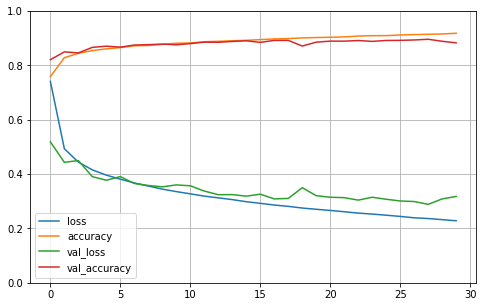

In [35]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [41]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 51.0054 - accuracy: 0.8693


[51.005367279052734, 0.8693000078201294]

In [43]:
xnew = X_test[:3]
y_proba = model.predict(xnew)
y_proba

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [47]:
y_pred = np.argmax(model.predict(xnew), axis=1)
y_pred

array([9, 2, 1], dtype=int64)

In [51]:
ynew = y_test[:3]
ynew

array([9, 2, 1], dtype=uint8)